In [176]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [4]:
print(f"Current working directory:{Path.cwd()}")

Current working directory:/Users/aalfiler/Sites/project1_working folder


In [5]:
crypto_path = Path("/Users/aalfiler/Sites/project1_working folder/CoinMarketCap_allcrypto_18JAN2020.xlsx")

In [6]:
crypto_df = pd.read_excel(crypto_path, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [7]:
crypto_df.head()

,Open,High,Low,Close,Volume,Market Cap,Crypto
Date,,,,,,,
2021-01-01,29376.46,33155.12,29091.18,32127.27,67865420765,597205944669,BTC
2020-12-31,28994.01,29600.63,28803.59,29374.15,40730301359,546001594838,BTC
2020-12-30,28841.57,29244.88,28201.99,29001.72,46754964848,539051138108,BTC
2020-12-29,27360.09,28937.74,27360.09,28840.95,51287442704,536033807161,BTC
2020-12-28,27081.81,27370.72,25987.30,27362.44,45265946774,508523687097,BTC


In [10]:
crypto_df.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market Cap      int64
Crypto         object
dtype: object

In [11]:
crypto_df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Crypto        0
dtype: int64

In [12]:
close_df=crypto_df.drop(columns=['Open','High', 'Low', 'Volume', 'Market Cap'])

In [13]:
close_df.head()

,Close,Crypto
Date,,
2021-01-01,32127.27,BTC
2020-12-31,29374.15,BTC
2020-12-30,29001.72,BTC
2020-12-29,28840.95,BTC
2020-12-28,27362.44,BTC


In [87]:
count_per_crypto = close_df.groupby('Crypto')['Close'].count()

In [88]:
count_per_crypto

Crypto
BCH     1259
BSV      785
BTC     2806
CCXX     257
DASH    2514
ETH     1975
KSM      387
LTC     2806
XMR     2417
ZEC     1526
Name: Close, dtype: int64

Crypto
BCH     AxesSubplot(0.125,0.125;0.775x0.755)
BSV     AxesSubplot(0.125,0.125;0.775x0.755)
BTC     AxesSubplot(0.125,0.125;0.775x0.755)
CCXX    AxesSubplot(0.125,0.125;0.775x0.755)
DASH    AxesSubplot(0.125,0.125;0.775x0.755)
ETH     AxesSubplot(0.125,0.125;0.775x0.755)
KSM     AxesSubplot(0.125,0.125;0.775x0.755)
LTC     AxesSubplot(0.125,0.125;0.775x0.755)
XMR     AxesSubplot(0.125,0.125;0.775x0.755)
ZEC     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Close, dtype: object

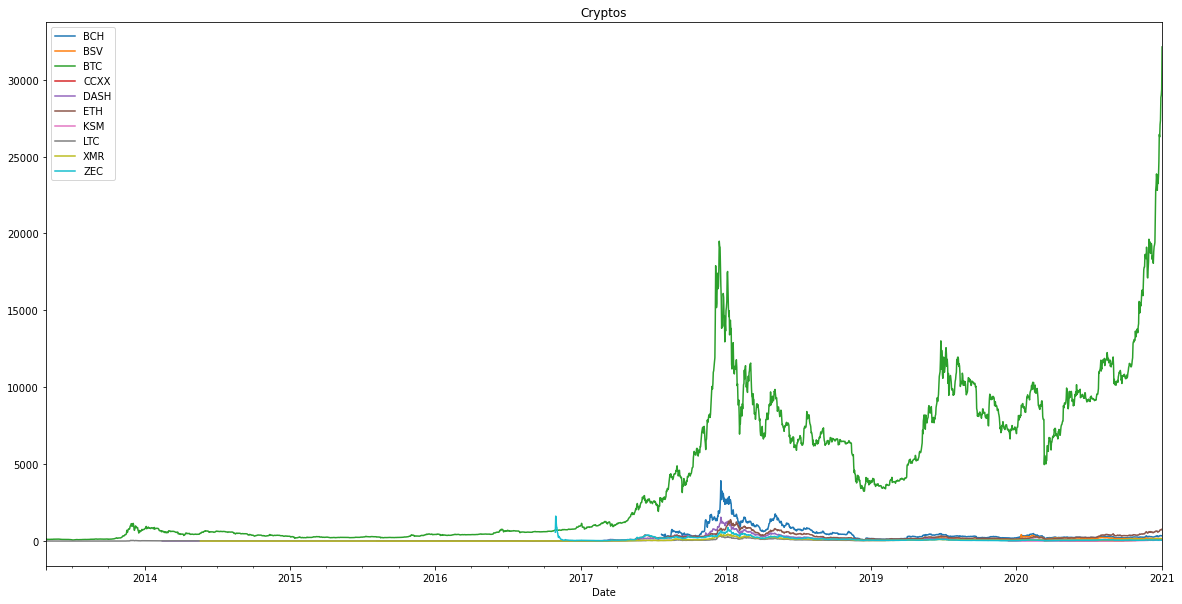

In [90]:
grouped_cryptos = close_df.groupby('Crypto')['Close'].plot(legend=True, figsize=(20, 10), title="Cryptos")
grouped_cryptos

# Comparing Cryptos within Asset Class 

In [153]:
all_crypto = pd.ExcelFile('/Users/aalfiler/Sites/project1_working folder/CoinMarketCap_18JAN2020-close.xlsx')
all_close = pd.read_excel(all_crypto, 'All')

In [152]:
all_close.head()

,Date,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
0,2021-01-01,32127.27,774.53,163.09,136.94,143.12,86.97,69.50,56.79,341.99,88.27
1,2020-12-31,29374.15,730.37,163.12,126.23,136.05,88.24,71.96,63.99,343.05,89.10
2,2020-12-30,29001.72,737.80,163.63,124.69,156.57,99.61,62.04,64.20,358.81,87.88
3,2020-12-29,28840.95,751.62,166.90,129.47,159.37,101.68,61.26,66.54,353.09,87.67
4,2020-12-28,27362.44,731.52,164.40,129.04,161.39,104.04,58.24,69.02,362.09,87.39


In [154]:
all_close.dtypes

Date                datetime64[ns]
Bitcoin-BTC                float64
Ethereum-ETH               float64
Bitcoin-BSV                float64
Litecoin-LTC               float64
Monero-XMR                 float64
Dash-DASH                  float64
Kusama-KSM                 float64
Zcash-ZEC                  float64
Bitcoin Cash-BCH           float64
Counos-CCXX                float64
dtype: object

In [155]:
all_close.isnull().sum()

Date                   0
Bitcoin-BTC            0
Ethereum-ETH         831
Bitcoin-BSV         2021
Litecoin-LTC           0
Monero-XMR           389
Dash-DASH            292
Kusama-KSM          2420
Zcash-ZEC           1281
Bitcoin Cash-BCH    1548
Counos-CCXX         2550
dtype: int64

In [156]:
all_close = all_close.dropna().copy()

In [157]:
all_close.isnull().sum()

Date                0
Bitcoin-BTC         0
Ethereum-ETH        0
Bitcoin-BSV         0
Litecoin-LTC        0
Monero-XMR          0
Dash-DASH           0
Kusama-KSM          0
Zcash-ZEC           0
Bitcoin Cash-BCH    0
Counos-CCXX         0
dtype: int64

In [158]:
all_date_index = all_close.set_index("Date").head()
all_date_index

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
Date,,,,,,,,,,
2021-01-01,32127.27,774.53,163.09,136.94,143.12,86.97,69.50,56.79,341.99,88.27
2020-12-31,29374.15,730.37,163.12,126.23,136.05,88.24,71.96,63.99,343.05,89.10
2020-12-30,29001.72,737.80,163.63,124.69,156.57,99.61,62.04,64.20,358.81,87.88
2020-12-29,28840.95,751.62,166.90,129.47,159.37,101.68,61.26,66.54,353.09,87.67
2020-12-28,27362.44,731.52,164.40,129.04,161.39,104.04,58.24,69.02,362.09,87.39


In [188]:
# Plot closing prices
all_date_index.hvplot(title="CoinMarketCap: Crypto Closing Prices", ylabel="Closing Price", kind='line', width=1000, height=500, x="Date")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
# Group by year + month
all_date_index = all_date_index.groupby([all_date_index.index.year, all_date_index.index.month]).mean() # this will yield an error

In [169]:
# Generate summary stats
all_date_index.describe()

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,29341.306000,745.168000,164.228000,129.274000,151.300000,96.108000,64.600000,64.108000,351.806000,88.062000
std,1735.242026,18.461389,1.585046,4.720692,11.115089,7.931524,5.838202,4.572141,9.075885,0.663152
min,27362.440000,730.370000,163.090000,124.690000,136.050000,86.970000,58.240000,56.790000,341.990000,87.390000
25%,28840.950000,731.520000,163.120000,126.230000,143.120000,88.240000,61.260000,63.990000,343.050000,87.670000
50%,29001.720000,737.800000,163.630000,129.040000,156.570000,99.610000,62.040000,64.200000,353.090000,87.880000
75%,29374.150000,751.620000,164.400000,129.470000,159.370000,101.680000,69.500000,66.540000,358.810000,88.270000
max,32127.270000,774.530000,166.900000,136.940000,161.390000,104.040000,71.960000,69.020000,362.090000,89.100000


In [171]:
# Bar plot showing the total closing cost per day
all_date_index.hvplot.bar(x='Date', y=["Bitcoin-BTC", "Ethereum-ETH", "Bitcoin-BSV", "Litecoin-LTC", "Monero-XMR", "Dash-DASH", "Kusama-KSM", "Zcash-ZEC", "Bitcoin Cash-BCH", "Counos-CCXX"],
                 stacked=True, rot=90, width=1000, height=600, title="CoinMarketCap: Crypto Total Closing Prices")

:Bars   [Date,Variable]   (value)

In [172]:
# Calculate the correlation between cryptos
correlation = all_date_index.corr() 
correlation

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
Bitcoin-BTC,1.000000,0.839682,-0.425483,0.707402,-0.636223,-0.824489,0.716118,-0.988176,-0.809681,0.478244
Ethereum-ETH,0.839682,1.000000,0.019484,0.884583,-0.169325,-0.426813,0.276194,-0.785323,-0.510767,-0.025929
Bitcoin-BSV,-0.425483,0.019484,1.000000,-0.071048,0.657752,0.661703,-0.600255,0.543213,0.380301,-0.580563
Litecoin-LTC,0.707402,0.884583,-0.071048,1.000000,-0.196413,-0.420106,0.251523,-0.658311,-0.483478,-0.051943
Monero-XMR,-0.636223,-0.169325,0.657752,-0.196413,1.000000,0.959031,-0.989871,0.646077,0.904206,-0.964389
Dash-DASH,-0.824489,-0.426813,0.661703,-0.420106,0.959031,1.000000,-0.975621,0.831647,0.944098,-0.865982
Kusama-KSM,0.716118,0.276194,-0.600255,0.251523,-0.989871,-0.975621,1.000000,-0.714843,-0.944421,0.949733
Zcash-ZEC,-0.988176,-0.785323,0.543213,-0.658311,0.646077,0.831647,-0.714843,1.000000,0.766026,-0.487759
Bitcoin Cash-BCH,-0.809681,-0.510767,0.380301,-0.483478,0.904206,0.944098,-0.944421,0.766026,1.000000,-0.823243
Counos-CCXX,0.478244,-0.025929,-0.580563,-0.051943,-0.964389,-0.865982,0.949733,-0.487759,-0.823243,1.000000


<AxesSubplot:>

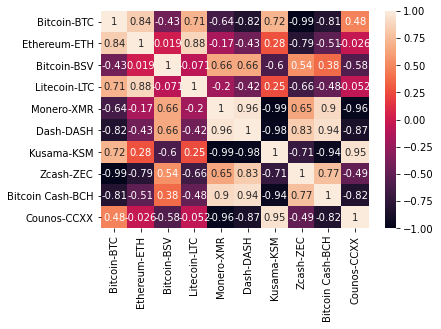

In [180]:
# Plot correlation
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)